# Predicting Invariant Mass of Electron Pairs from CERN Collision Data with Neural Networks

## Invariant Mass Prediction

The **invariant mass** is a fundamental concept in particle physics that represents the total energy of a system of particles, independent of the reference frame. It is calculated using the energy and momentum of the particles involved, and it remains constant regardless of the system's motion. For two electrons, the invariant mass is determined by the combined energy and momentum of the electron pair, providing a measure of the system's total energy that is not affected by its velocity or frame of reference.

In particle physics experiments, the invariant mass is a critical tool for identifying particle decays and interactions. By calculating the invariant mass of electron pairs, researchers can uncover properties of the particle that decayed into the electrons, such as the Higgs boson or other heavy particles. This measurement plays a crucial role in **high-energy physics research**, enabling scientists to test theoretical models and search for new particles by analyzing the decay products of fundamental interactions.

The goal of this project is to develop a **Machine Learning (ML) algorithm** for predicting the invariant mass using data from CERN, specifically from the CERN Open Data Portal. The dataset is available at [CERN Open Data Portal](https://opendata.cern.ch/record/304).

**Acknowledgements**

McCauley, Thomas; (2014). https://opendata.cern.ch/record/304

### Import Libraries ###

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from keras import regularizers, Input
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
import keras as kr
import numpy as np

### Load the data ###

In [2]:
file_path = r"C:\Users\Dell\Desktop\Alpha\Schmetterling\CERN_DATA\dielectron.csv"
DF_CERN = pd.read_csv(file_path)

### Content and Features of the Dataset

- **Run**: The run number of the event.
- **Event**: The event number.
- **E1, E2**: The total energy of electrons 1 and 2 (in GeV).
- **px1, py1, pz1, px2, py2, pz2**: The components of the momentum for electrons 1 and 2 (in GeV).
- **pt1, pt2**: The transverse momentum of electrons 1 and 2 (in GeV).
- **eta1, eta2**: The pseudorapidity of electrons 1 and 2.
- **phi1, phi2**: The phi angle of electrons 1 and 2 (in radians).
- **Q1, Q2**: The charge of electrons 1 and 2.
- **M**: The invariant mass of the two electrons (in GeV).



In [3]:
print(DF_CERN.head(5))

      Run      Event        E1       px1        py1       pz1       pt1  \
0  147115  366639895  58.71410  -7.31132  10.531000 -57.29740  12.82020   
1  147115  366704169   6.61188  -4.15213  -0.579855  -5.11278   4.19242   
2  147115  367112316  25.54190 -11.48090   2.041680  22.72460  11.66100   
3  147115  366952149  65.39590   7.51214  11.887100  63.86620  14.06190   
4  147115  366523212  61.45040   2.95284 -14.622700 -59.61210  14.91790   

      eta1     phi1  Q1       E2        px2      py2      pz2       pt2  \
0 -2.20267  2.17766   1  11.2836  -1.032340 -1.88066 -11.0778   2.14537   
1 -1.02842 -3.00284  -1  17.1492 -11.713500  5.04474  11.4647  12.75360   
2  1.42048  2.96560   1  15.8203  -1.472800  2.25895 -15.5888   2.69667   
3  2.21838  1.00721   1  25.1273   4.087860  2.59641  24.6563   4.84272   
4 -2.09375 -1.37154  -1  13.8871  -0.277757 -2.42560 -13.6708   2.44145   

       eta2      phi2  Q2         M  
0 -2.344030 -2.072810  -1   8.94841  
1  0.808077  2.734920 

## Feature Engineering

- **E_sum**: The sum of the energies of the two electrons.

- **pt_sum**: The sum of the transverse momenta of the two electrons.

- **momentum_magnitude1**: The magnitude of the momentum for electron 1, calculated using the euclidean norm of momentum components.

- **momentum_magnitude2**: The magnitude of the momentum for electron 2, calculated using the euclidean norm of momentum components.
  
- **delta_phi**: The absolute difference between the phi angles of the two electrons.

- **delta_eta**: The absolute difference between the pseudorapidity of the two electrons.

- **delta_pt**: The absolute difference between the transverse momenta of the two electrons.


In [4]:
DF_CERN['E_sum'] = DF_CERN['E1'] + DF_CERN['E2']
DF_CERN['pt_sum'] = DF_CERN['pt1'] + DF_CERN['pt2']
DF_CERN['momentum_magnitude1'] = np.sqrt(DF_CERN['px1']**2 + DF_CERN['py1']**2 + DF_CERN['pz1']**2)
DF_CERN['momentum_magnitude2'] = np.sqrt(DF_CERN['px2']**2 + DF_CERN['py2']**2 + DF_CERN['pz2']**2)
DF_CERN['delta_phi'] = np.abs(DF_CERN['phi1'] - DF_CERN['phi2'])
DF_CERN['delta_eta'] = np.abs(DF_CERN['eta1'] - DF_CERN['eta2'])
DF_CERN['delta_pt'] = np.abs(DF_CERN['pt1'] - DF_CERN['pt2'])

### Handle missing data ###

In [5]:
if DF_CERN.isnull().sum().sum() > 0:
    DF_CERN = DF_CERN.dropna()

### First feature selection ###

In [6]:
X = DF_CERN.drop(columns=["M"])
Y = DF_CERN[["M"]]

### Graphing and data visualization ###

In this cell, I standardize the features in the dataset by subtracting the mean and dividing by the standard deviation, ensuring all features have a mean of 0 and a standard deviation of 1.

Subsequently, I exclude non-numerical or irrelevant columns (`Run`, `Event`, `Q1`, `Q2`, and `M`) from the list of features to plot. For each selected feature, I generate a scatter plot against the invariant mass (`M`), providing a visual representation of their relationships, with features on the x-axis and `M` on the y-axis..

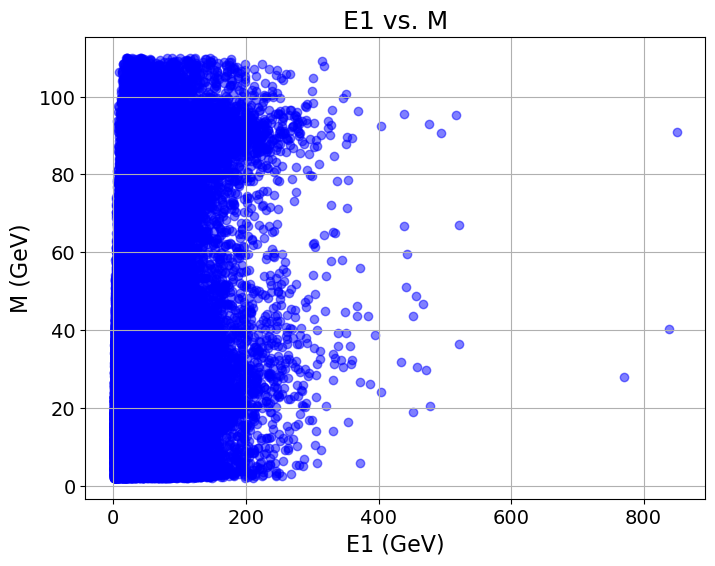

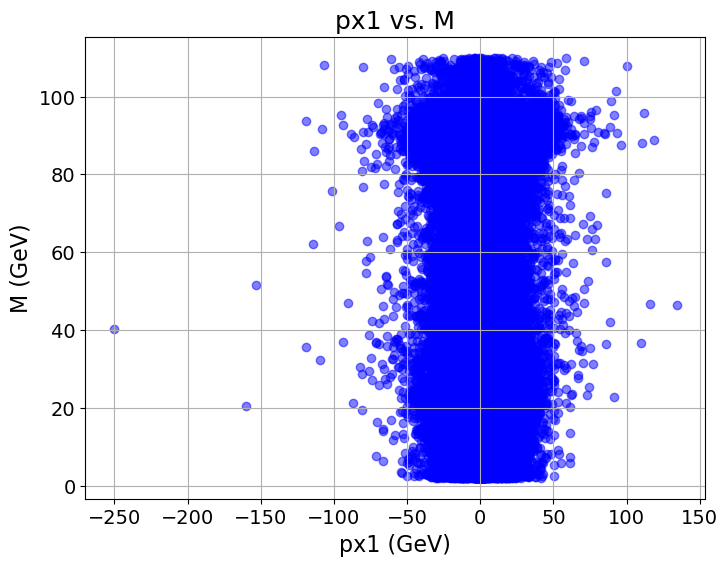

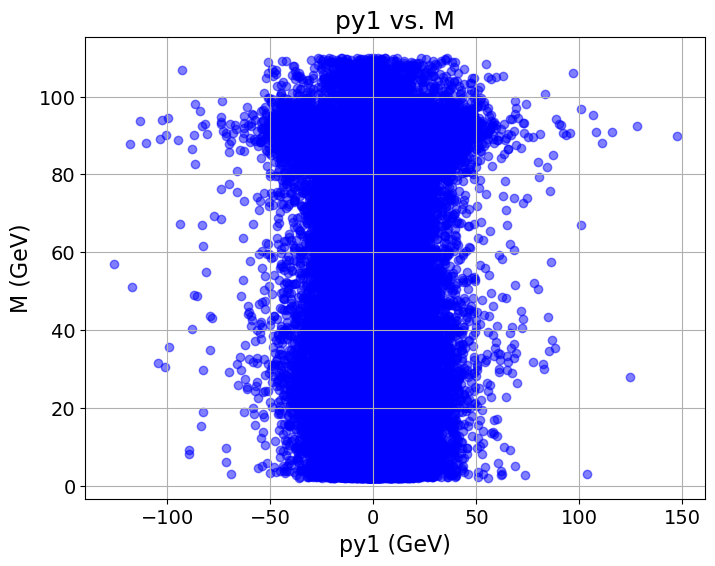

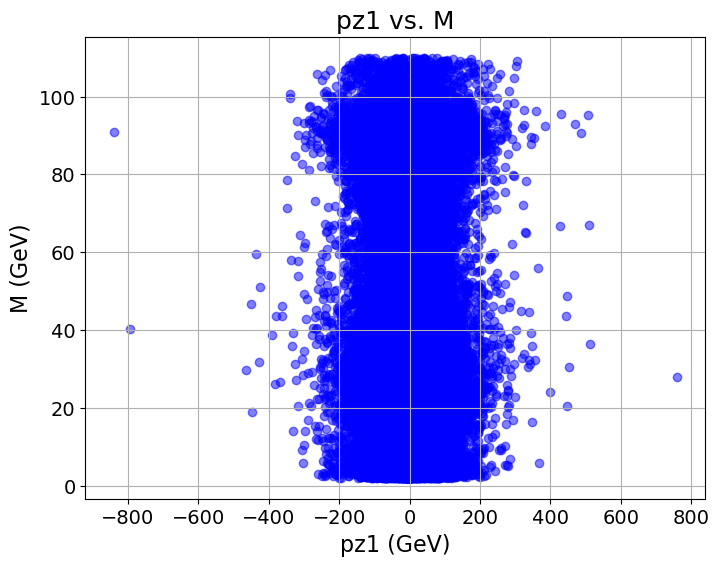

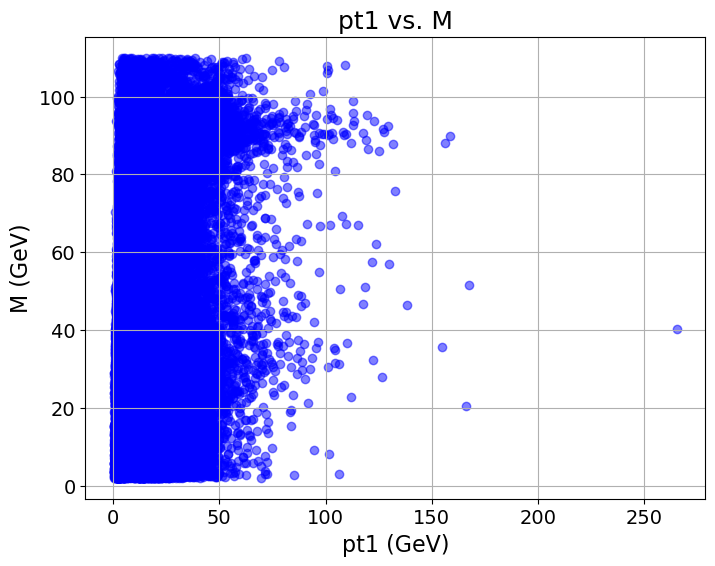

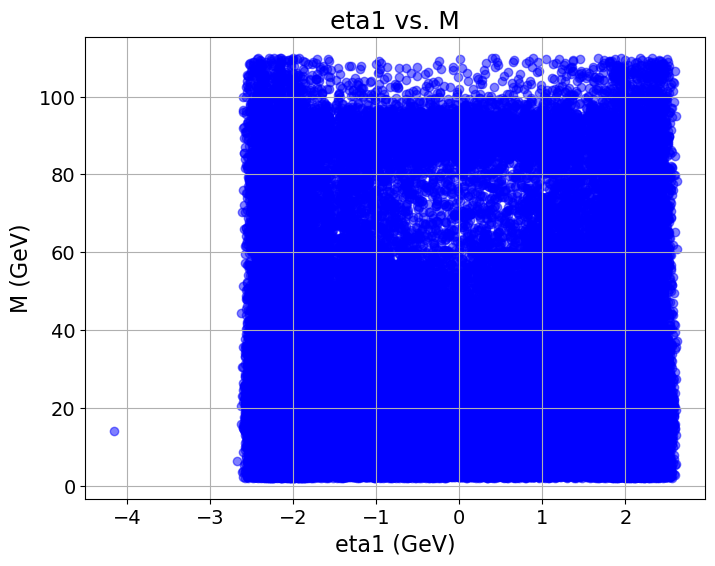

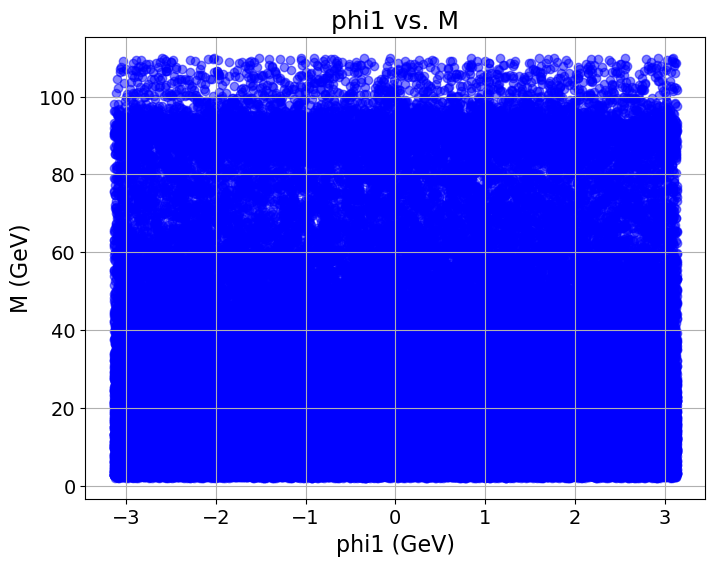

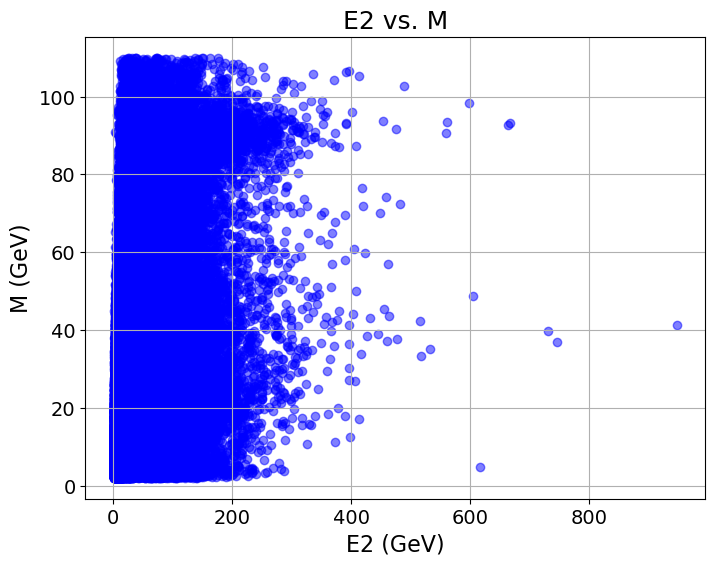

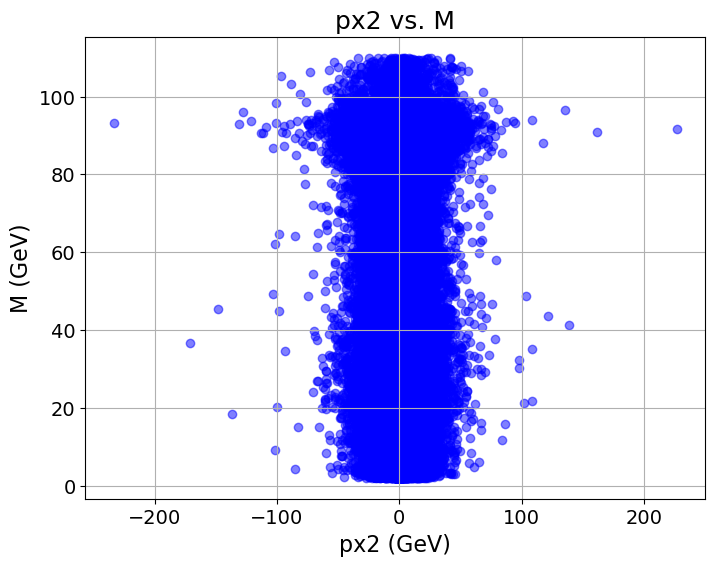

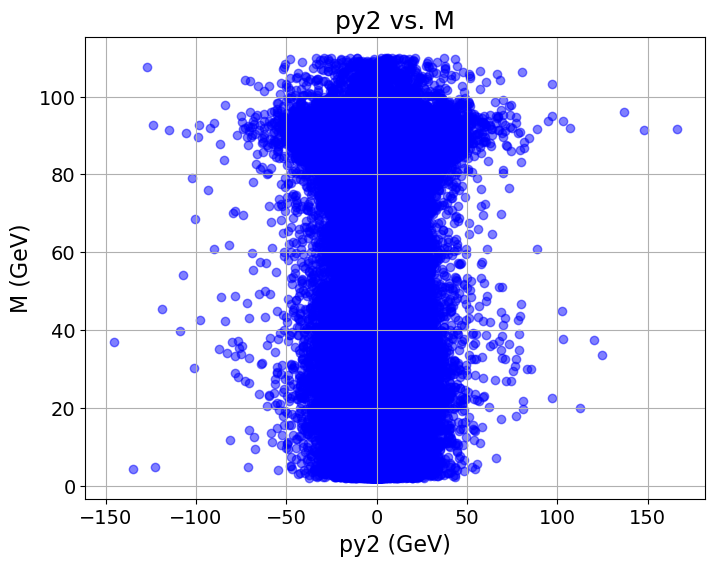

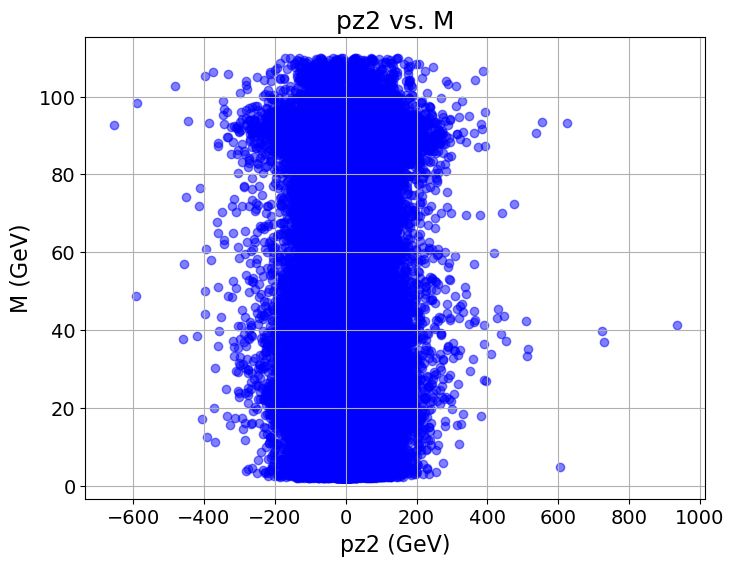

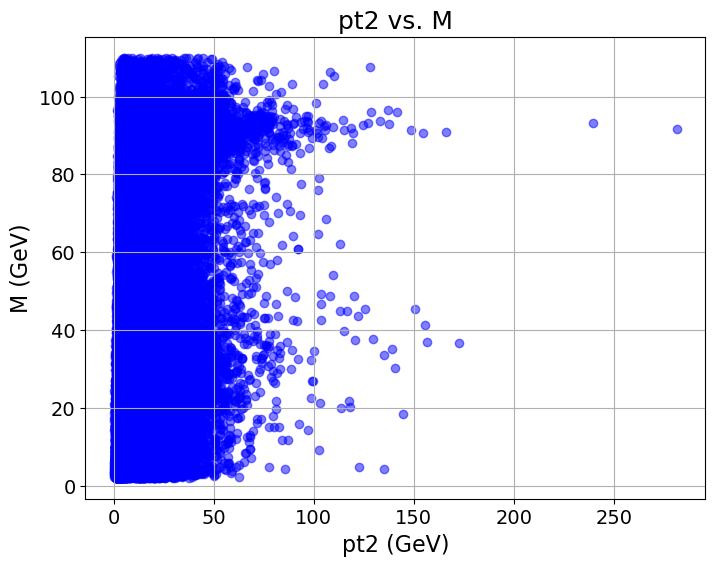

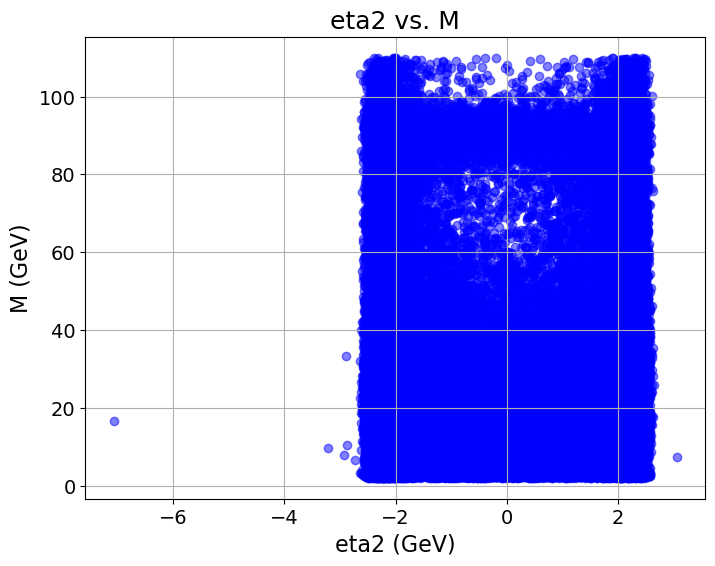

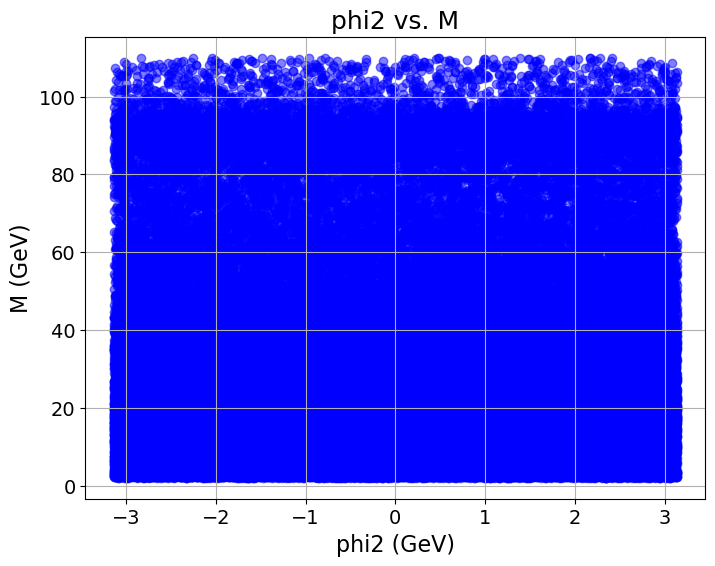

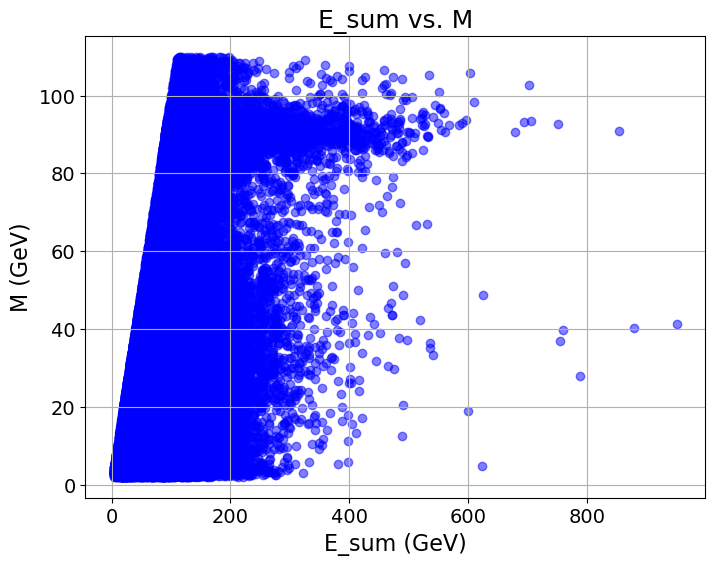

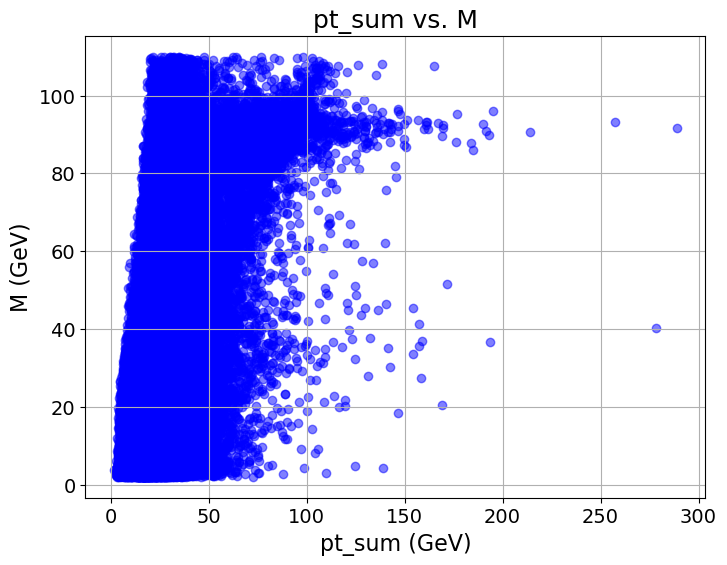

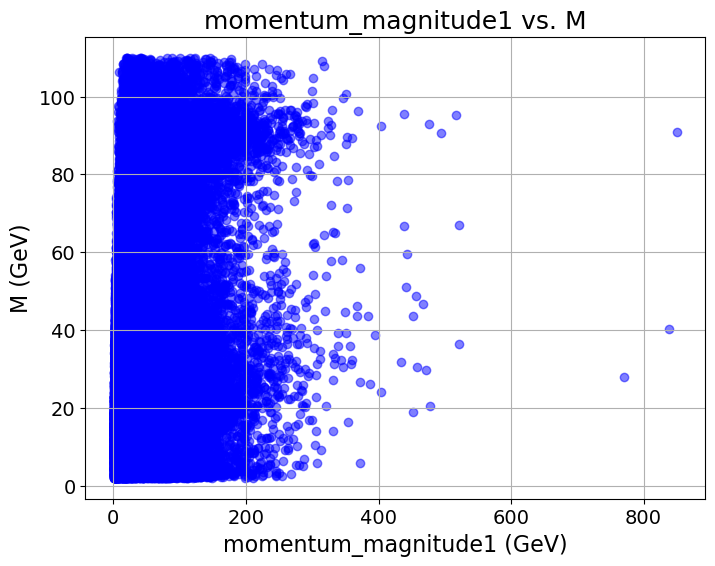

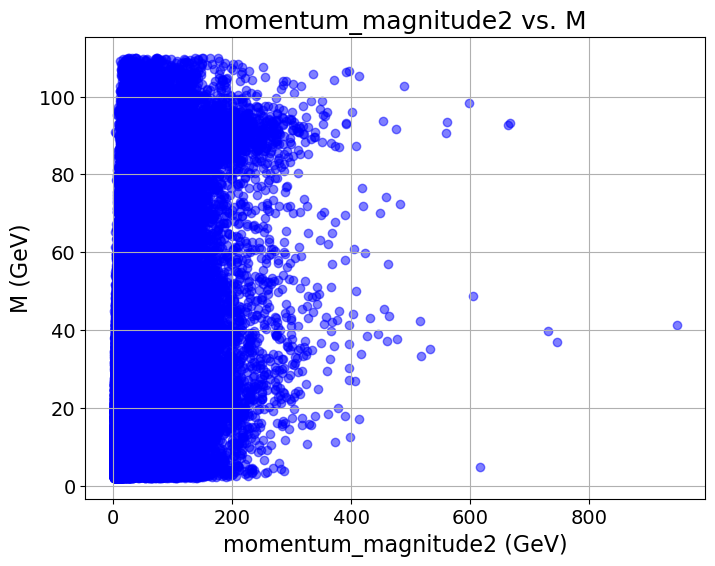

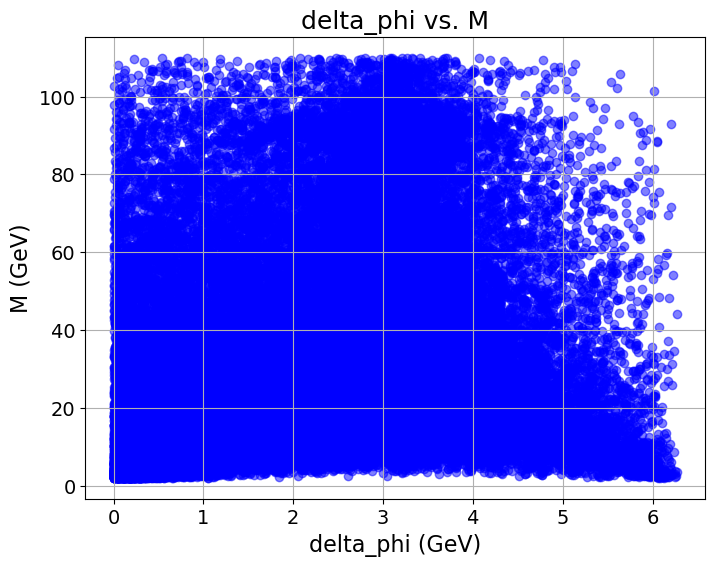

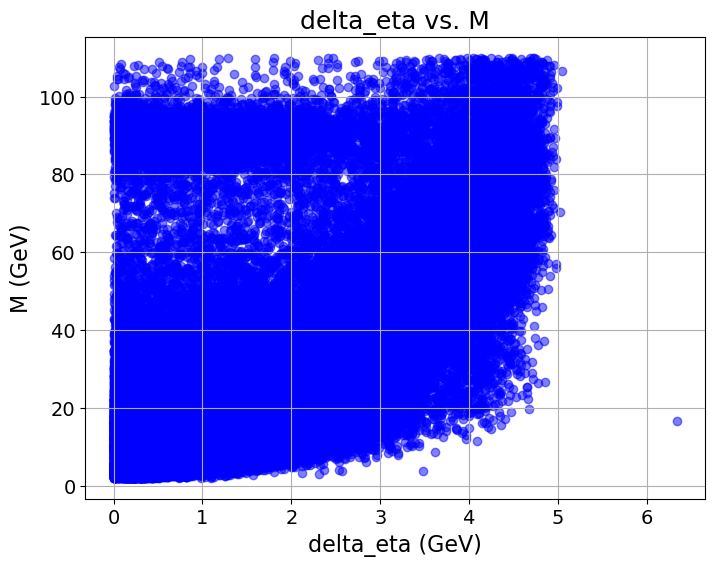

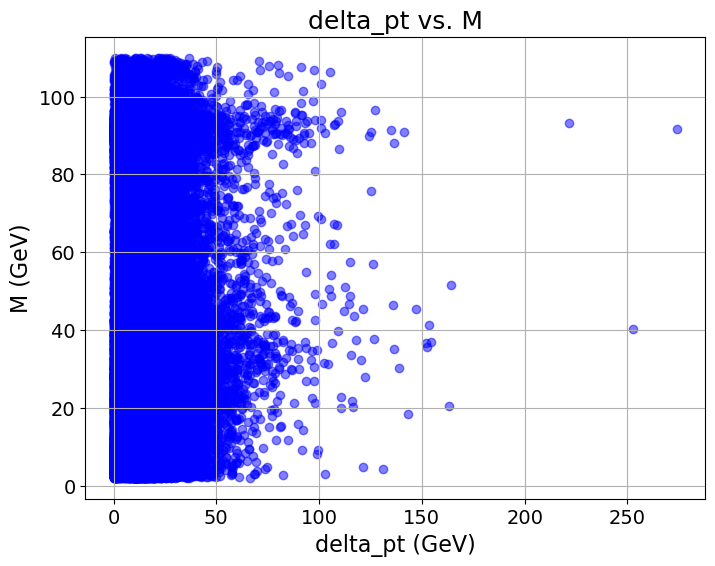

In [7]:
X = (X - X.mean()) / X.std()
features_to_plot = [col for col in X.columns if col not in ["Run", "Event", "Q1", "Q2", "M"]]
for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    plt.scatter(DF_CERN[feature], DF_CERN["M"], alpha=0.5, color='blue')
    plt.xlabel(f'{feature} (GeV)', fontsize=16)
    plt.ylabel('M (GeV)', fontsize=16)
    plt.title(f'{feature} vs. M', fontsize=18)
    plt.grid(True)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()

### Selecting Features with Random Forest Algorithm, ###

In this code, I first split the dataset into features (`X`) and the target variable (`Y`), where `M` (the invariant mass) is my target, and the other numerical features are predictors, excluding `Run` and `Event`. Then, I split the data into training and testing sets, using 70% for training and 30% for testing. 

Next, I trained a Random Forest Regressor with 10 estimators on the training data. After training, I extracted the feature importances from the model and sorted them in descending order. I selected the top 10 features and their corresponding importance values and visualized them using a horizontal bar plot. This plot helps me identify the most relevant data in order to build the final feature vector for the ML algorithm.

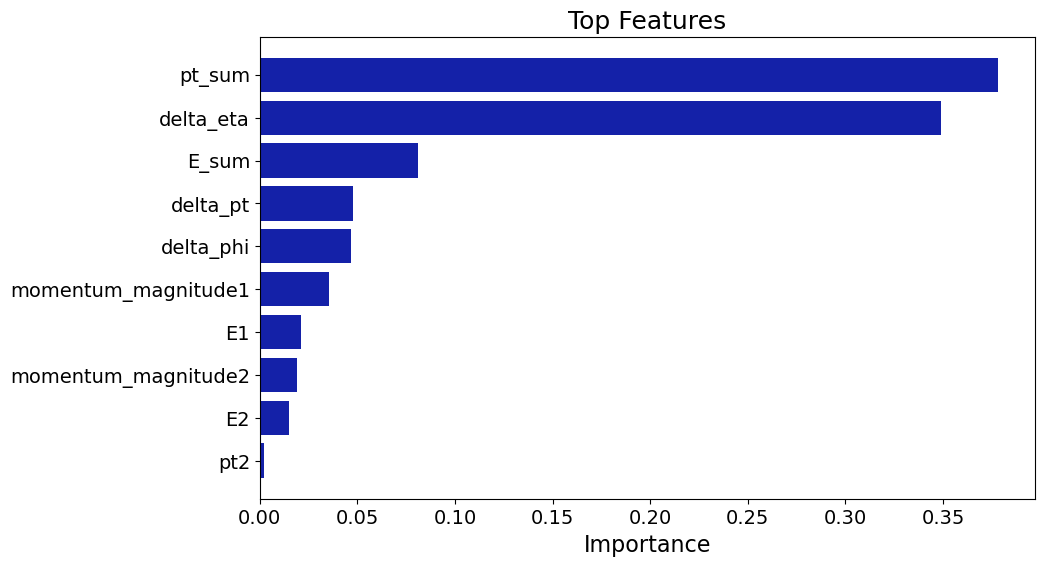

In [8]:
X = DF_CERN.drop(columns=["M", "Run", "Event"])
Y = DF_CERN["M"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
rf_model = RandomForestRegressor(n_estimators=10)
rf_model.fit(X_train, Y_train)
importances = rf_model.feature_importances_
features = X.columns
sorted_indices = np.argsort(importances)[::-1]
top_features = features[sorted_indices[:10]]
top_importances = importances[sorted_indices[:10]]
plt.figure(figsize=(10, 6))
plt.barh(top_features[::-1], top_importances[::-1], color='#1421a8')  
plt.xlabel('Importance', fontsize=16)
plt.title('Top Features', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Neural network development and training ###

For this project, I implemented a **neural network algorithm** to predict the invariant mass. The model incorporates L1 regularization to mitigate overfitting and includes a modifiable learning rate as a hyperparameter for fine-tuning the optimization process. The architecture consists of a simple structure: an input layer, two hidden layers with 30 and 15 neurons respectively using the Leaky ReLU activation function, and an output layer without an activation function, suitable for regression tasks.

The model was trained over 50 iterations (epochs) using the hold-out method, splitting the data into 70% for training and 30% for testing. To optimize the network, I utilized the Mean Squared Error (MSE) loss function, ensuring accurate predictions while minimizing regression error. The final feature vector is incorporated at the beginning of the cell.

In [9]:
X = DF_CERN[["pt_sum", "delta_eta", "E_sum", "delta_pt", "delta_phi", "E1", "E2", "momentum_magnitude1", "momentum_magnitude2"]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

Λ = 1e-3
α = 1e-3

input_layer = Input(shape=(X_train.shape[1],))

model = kr.models.Sequential([
    kr.layers.Dense(30, activation='leaky_relu', kernel_regularizer=regularizers.l1(Λ)), 
    kr.layers.Dense(15, activation='leaky_relu'),  
    kr.layers.Dense(1, activation='linear')
])

optimizer = kr.optimizers.Adam(learning_rate=α)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

history = model.fit(X_train, Y_train, epochs=50, validation_split=0.3, verbose=False)

### Learning curve plotting ###

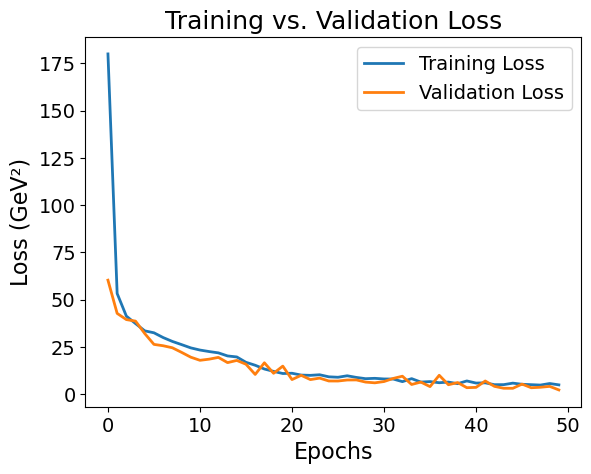

In [10]:
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Loss (GeV²)', fontsize=16)
plt.legend(fontsize=14)
plt.title('Training vs. Validation Loss', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Performance visualization ###

937/937 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


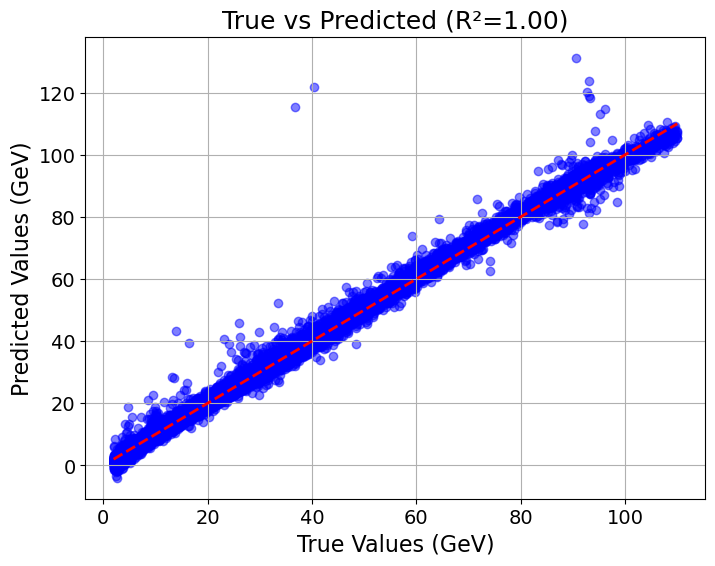

In [11]:
Y_pred = model.predict(X_test)
r2 = r2_score(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('True Values (GeV)', fontsize=16)
plt.ylabel('Predicted Values (GeV)', fontsize=16)
plt.title(f'True vs Predicted (R²={r2:.2f})', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

### Coefficient of determination ###

In [12]:
print(f"R²: {r2}")

R²: 0.9957923090178273


### Conclusions ###

The developed algorithm has successfully predicted the invariant mass of electron pairs using 9 key features: **"pt_sum", "delta_eta", "E_sum", "delta_pt", "delta_phi", "E1", "E2", "momentum_magnitude1",** and **"momentum_magnitude2"**. The regression model achieved an impressive performance with an **R² value greater than 0.99**, indicating exceptional predictive accuracy. Additionally, the learning curve shows no signs of dangerous overfitting, suggesting that the model generalizes well to unseen data.

This project is significant for **particle physics**, where the invariant mass is a crucial quantity for understanding the properties of particles produced in high-energy collisions. By accurately predicting the invariant mass of electron pairs, the algorithm can assist in identifying decay products, such as those from the Higgs boson or other fundamental particles, and validating theoretical models of particle interactions. The ability to predict invariant mass with high precision can contribute to advancing **experimental physics**, providing insights into **new phenomena** and supporting the **discovery of new particles**.